# **SVM**

## *Data Import*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

## *About Data*

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## *EDA*

In [6]:
# there is no relation between PassengerId and Survived
# there is no relation between Cabin and Survived

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop("Cabin", axis= 1, inplace= True)
df.drop("PassengerId", axis= 1, inplace= True)

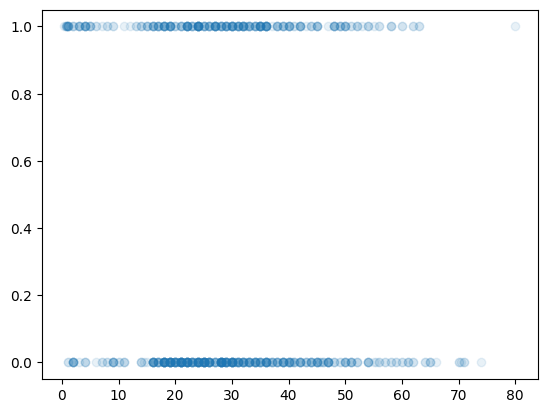

In [9]:
plt.scatter(x= "Age", y= "Survived", data= df, alpha= 0.1)


In [10]:
# survival information of people under age 15
df[(df["Age"] < 20) & (df["Survived"] == 1)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 9 to 887
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  79 non-null     int64  
 1   Pclass    79 non-null     int64  
 2   Name      79 non-null     object 
 3   Sex       79 non-null     object 
 4   Age       79 non-null     float64
 5   SibSp     79 non-null     int64  
 6   Parch     79 non-null     int64  
 7   Ticket    79 non-null     object 
 8   Fare      79 non-null     float64
 9   Embarked  79 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 6.8+ KB


In [11]:
# rate of survived people under age 15
round(len(df[(df["Age"] < 15) & (df["Survived"] == 1)]) / len(df[df["Age"] < 15]) * 100, 2)

57.69

In [12]:
# rate of survived people
round(len(df[df["Survived"] == 1]) / len(df) * 100, 2)

38.38

In [13]:
# survival information of people unknown age
age_na = df[df.Age.isna()]
age_na.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [14]:
age_na.value_counts("Survived")

Survived
0    125
1     52
Name: count, dtype: int64

In [15]:
age_na.value_counts("Pclass")

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [16]:
df.value_counts("Pclass")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**Is there a relation between age and survived?**

There are a lot of unknown aged people - about %20. If we try to assign value for them, this may change the way our model works.

Because of that, maybe there is a relation between age and survived but dropping entries with unknown age is better than to predict their values.

In [17]:
df.dropna(inplace= True)

(0.0, 300.0)

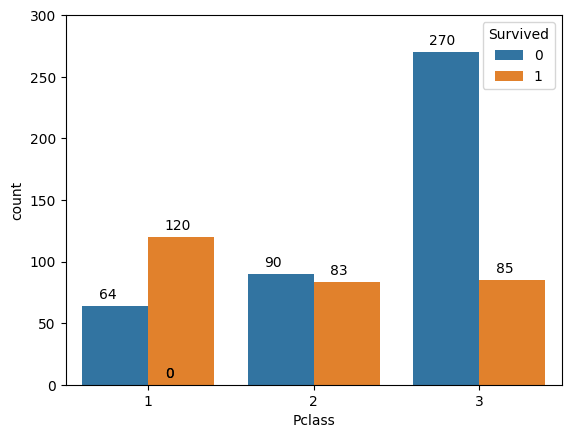

In [18]:
ax = sns.countplot(x="Pclass", data=df, hue="Survived")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))

plt.ylim(0, 300)

## *Train Test Split*

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [21]:
X = df.drop(["Name", "Ticket", "Survived"], axis= 1)
X = pd.get_dummies(X, drop_first= True)
y = df["Survived"]

In [22]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 9, test_size= 0.3)

## *SVM Model*

In [24]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

In [43]:
model = SVC()
C = 10. ** np.arange(-2, 4)
parameters = {
    "C" : C, 
    "kernel" : ["poly", "rbf"],
    "degree" : [2, 3, 4]
}

In [44]:
grid = GridSearchCV(model, parameters, cv= 9)
grid.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': [2, 3, 4], 'kernel': ['poly', 'rbf']})

In [45]:
grid.best_params_

{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}

In [54]:
prediction = grid.predict(X_test)

best parameters: {'C': 1000.0, 'degree': 2, 'kernel': 'poly'}
best score:      0.79726 (+/-0.02303)
{'C': 1000.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
30,0.116414,0.087157,0.000700,0.000037,1000.0,2,poly,"{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}",0.821429,0.767857,0.767857,0.818182,0.818182,0.763636,0.800000,0.800000,0.818182,0.797258,0.023026,1
29,0.003365,0.000101,0.000762,0.000033,100.0,4,rbf,"{'C': 100.0, 'degree': 4, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
27,0.003362,0.000151,0.000780,0.000018,100.0,3,rbf,"{'C': 100.0, 'degree': 3, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
25,0.003377,0.000155,0.000780,0.000020,100.0,2,rbf,"{'C': 100.0, 'degree': 2, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
35,0.012486,0.001994,0.000749,0.000042,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
33,0.012332,0.001987,0.000776,0.000050,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
31,0.012232,0.002000,0.000752,0.000051,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
32,0.867017,0.482136,0.000769,0.000024,1000.0,3,poly,"{'C': 1000.0, 'degree': 3, 'kernel': 'poly'}",0.732143,0.714286,0.732143,0.727273,0.709091,0.654545,0.745455,0.763636,0.654545,0.714791,0.035553,8
23,0.002519,0.000121,0.000790,0.000027,10.0,4,rbf,"{'C': 10.0, 'degree': 4, 'kernel': 'rbf'}",0.696429,0.678571,0.714286,0.672727,0.800000,0.581818,0.800000,0.690909,0.709091,0.704870,0.062662,9
21,0.002529,0.000109,0.000780,0.000031,10.0,3,rbf,"{'C': 10.0, 'degree': 3, 'kernel': 'rbf'}",0.696429,0.678571,0.714286,0.672727,0.800000,0.581818,0.800000,0.690909,0.709091,0.704870,0.062662,9


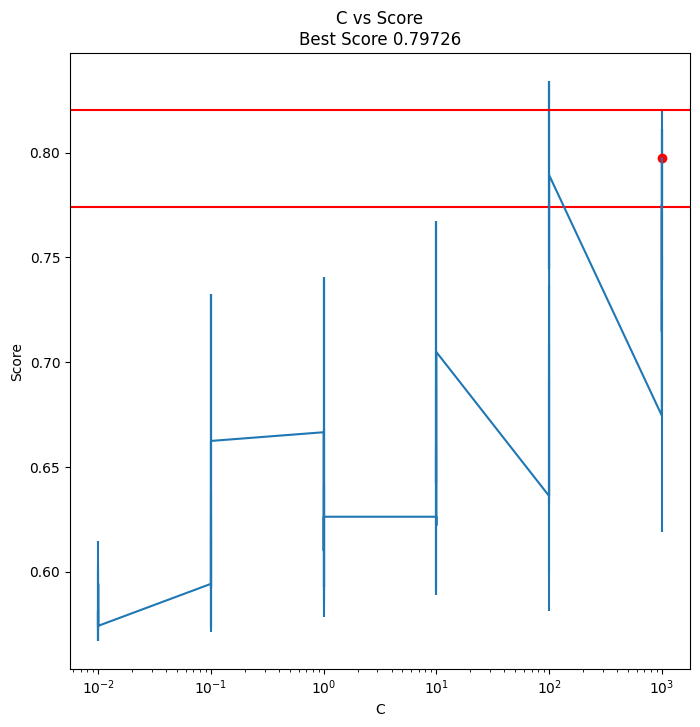

In [55]:
from grid_plot import GridSearch_table_plot

GridSearch_table_plot(grid, "C", negative= False)

## *Performance*

In [56]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

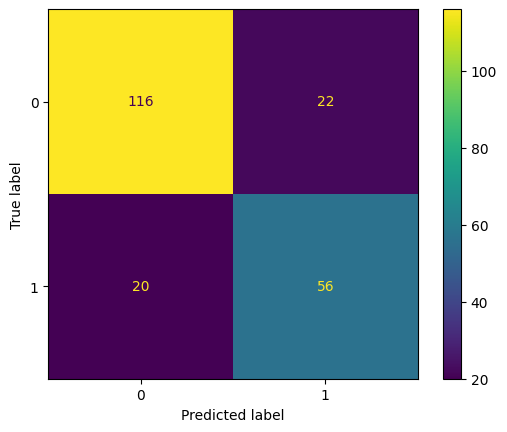

In [57]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [58]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       138
           1       0.72      0.74      0.73        76

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214

